# Grid Cell Phase Coding 

The first cell will load the analysis file. Next there are some parameters that can be changed - which **dataset** (1-8) and the **movement threshold** (0.1 - 0.3 works best). 

Once the trial is initialized, phase_analysis can be run on it to return the correlation value. There are then a number of graph functions that can be run: XY_plot(), phase_plot(), phase_map_plot(), trajectory_plot(), prediction_plot() and corr_plot(). 

Once the parameters in the second cell are set, the whole notebook can be ran via "Cell" -> "Run All"

In [1]:
import analysis

In [7]:
dataset = 1
move_thresh = 0.1

trial = analysis.gridCells('datasets/'+str(dataset)+'/',move_thresh, 'temporal')

In [8]:
trial.phase_analysis()

0.6283863498530543

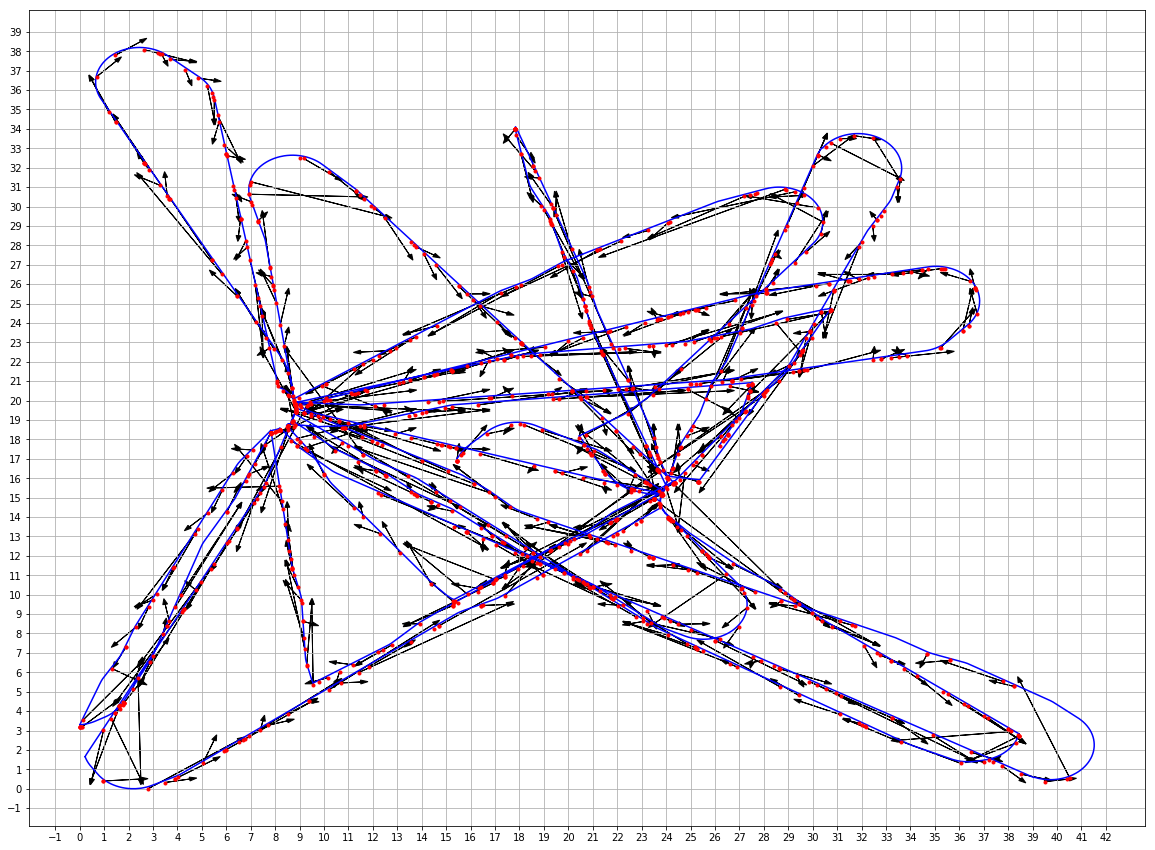

In [4]:
trial.prediction_plot()

/home/daniel/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


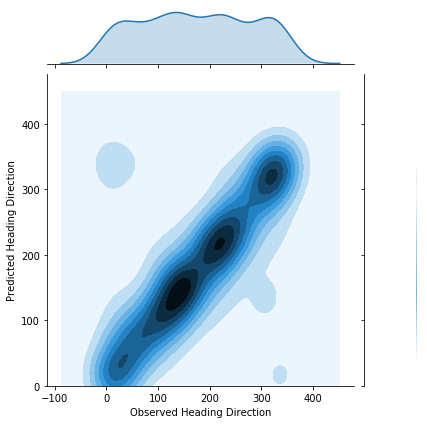

In [5]:
trial.corr_plot()

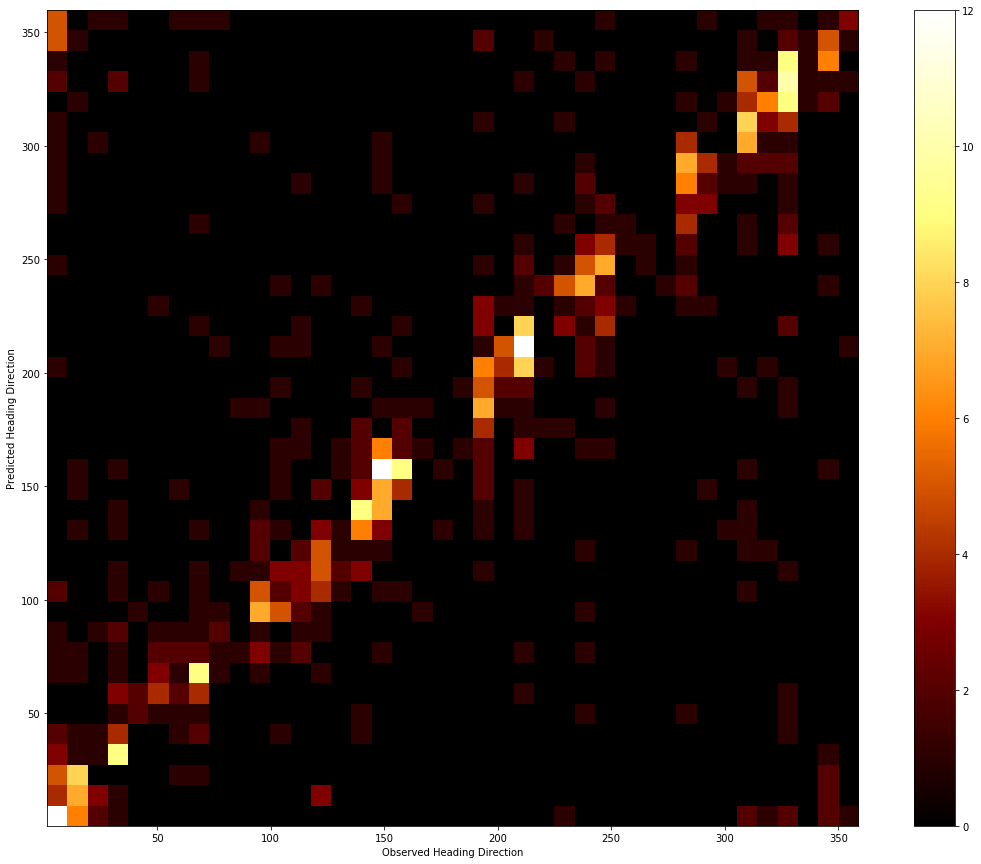

In [9]:
import numpy as np
import matplotlib.pyplot as plt
heatmap, xedges, yedges = np.histogram2d(trial.angles[:,0], trial.angles[:,1], bins=40)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower',cmap='afmhot')
plt.colorbar()
plt.ylabel('Predicted Heading Direction')
plt.xlabel('Observed Heading Direction')
plt.show()


In [56]:
trial.angles.min()

0.0

In [51]:
from astropy.stats import circcorrcoef
import astropy.units as u
circcorrcoef(trial.angles[:,0]*u.deg, trial.angles[:,1]*u.deg)

<Quantity 0.48880417>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

r_scores = np.asarray([[analysis.gridCells('datasets/'+str(ii+1)+'/',i/10, 'temporal').phase_analysis() for i in range(11)] for ii in range(8)])

In [10]:
for ii in range(8):
    plt.plot([i/10 for i in range(11)],r_scores[ii],'.-',markersize=12, label=sa[ii])
    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')
    plt.ylabel('Circular Correlation')
    plt.xlabel('Movement Threshold')

IndentationError: unexpected indent (<ipython-input-10-87d219502cb8>, line 7)

In [32]:
sa = []
for ii in range(8):
    s = analysis.gridCells('datasets/'+str(ii+1)+'/',move_thresh)
    s.phase_analysis()
    sa.append(len(s.XYspkT))
    

In [33]:
sa

[1178, 1256, 154, 149, 902, 232, 774, 4050]

In [5]:
import analysis
import numpy as np
import matplotlib.pyplot as plt

r_scores2 = np.asarray([[analysis.gridCells('datasets/'+str(ii+1)+'/',i/100,'temporal').phase_analysis() for i in range(11)] for ii in range(8)])

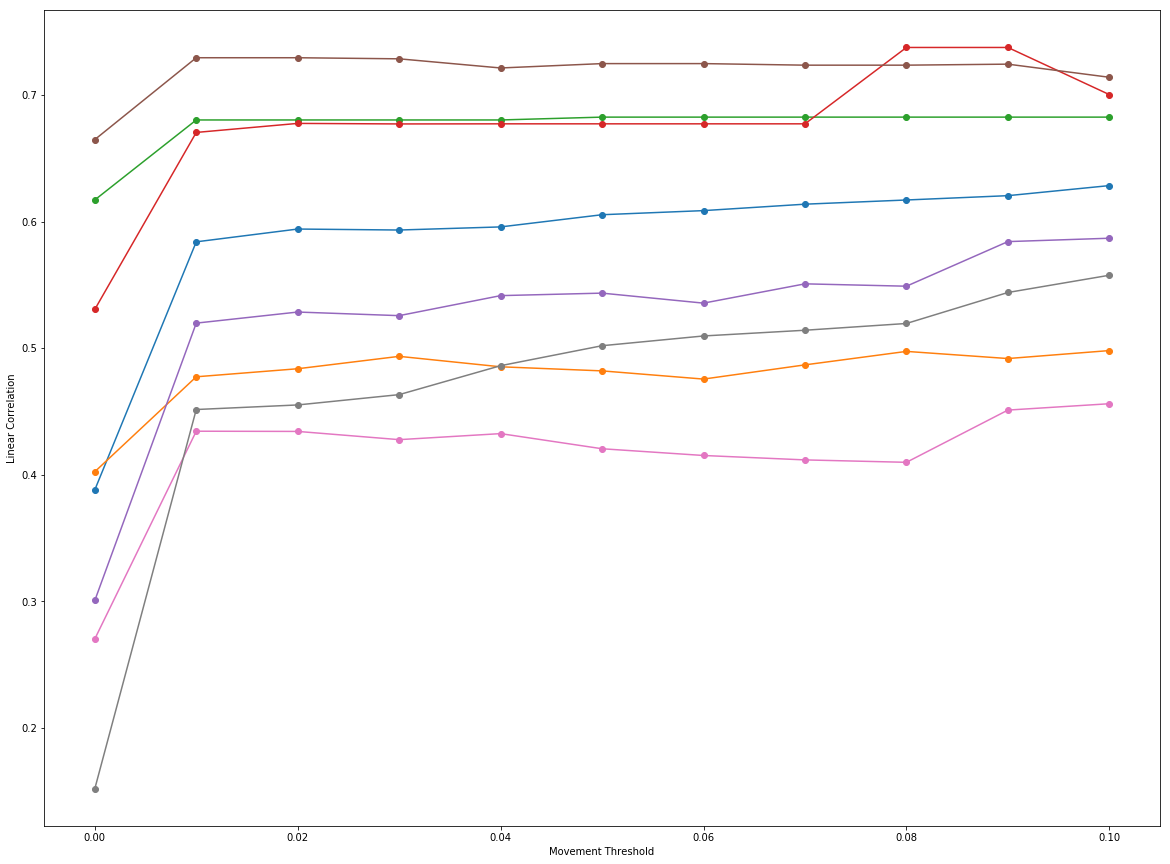

In [11]:
for ii in range(8):
    plt.plot([i/100 for i in range(11)],r_scores2[ii],'.-',markersize=12)
    plt.ylabel('Linear Correlation')
    plt.xlabel('Movement Threshold')

In [52]:
import pycircstat
pycircstat.corrcc(trial.angles[:,0],trial.angles[:,1])

0.009941564469372855

In [53]:
r_test = []
for i in range(11):
    trial = analysis.gridCells('datasets/'+str(dataset)+'/',i/10, 'spatial')
    trial.phase_analysis()
    r_test.append(pycircstat.corrcc(trial.angles[:,0],trial.angles[:,1]))

/home/daniel/PycharmProjects/Grid-Cell/analysis.py:28: RuntimeWarning: Mean of empty slice
  mpm_dict[ybin][xbin] = np.nanmean(np.asarray(phases))


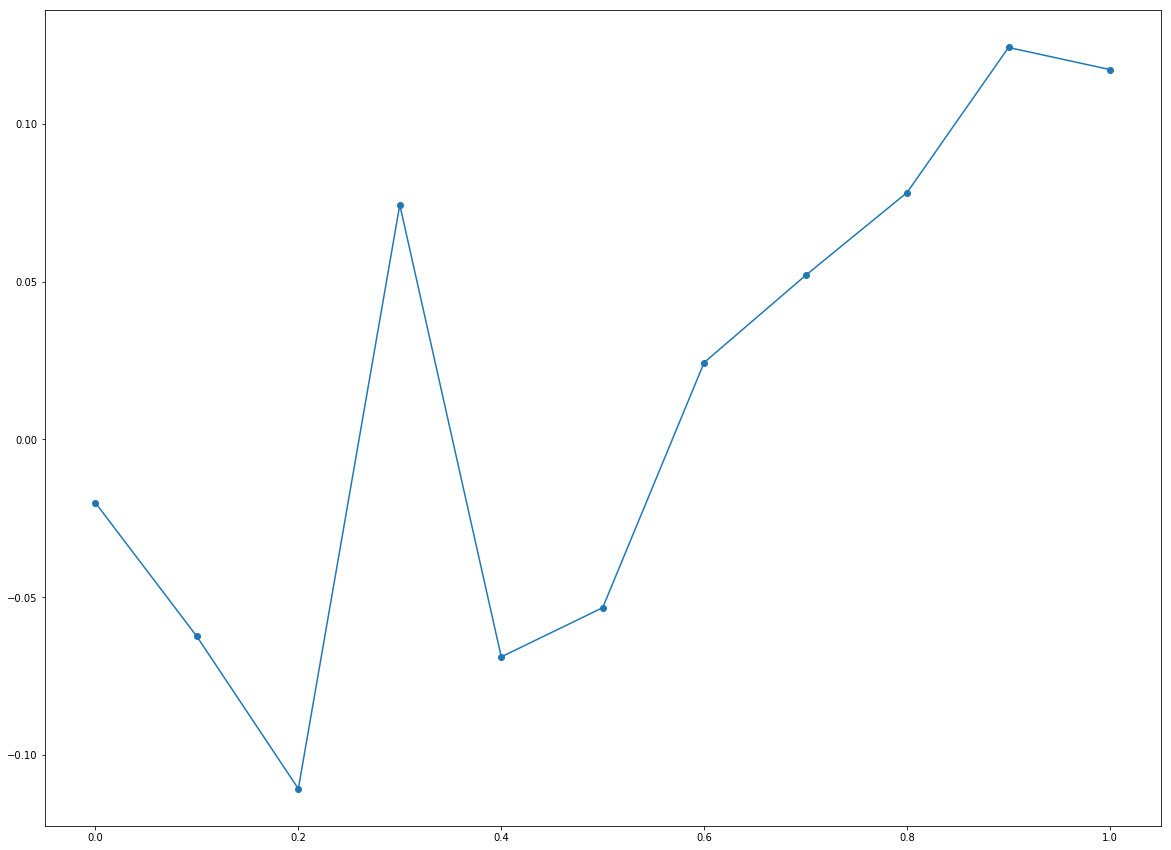

In [54]:
plt.plot([i/10 for i in range(11)],r_test,'.-',markersize=12)

In [13]:
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.tools as pt
import numpy as np

pt.set_credentials_file(username='danielhhowell', api_key='JS9gAxQhNlsv2kih2OKW')

# Create quiver figure
fig = ff.create_quiver(trial.all[:,1], trial.all[:,2], 
                       trial.all[:,7], trial.all[:,8],
                       scale=1,
                       arrow_scale=.4,
                       name='quiver',
                       line=dict(width=1))

# Create points
points = go.Scatter(x = trial.all[:,1], y = trial.all[:,2],
                    mode='markers',
                    marker=dict(size=12,
                               color='rgb(255,0,0)'),
                    name='points',)

# Add points to figure


py.iplot(fig)

/home/daniel/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



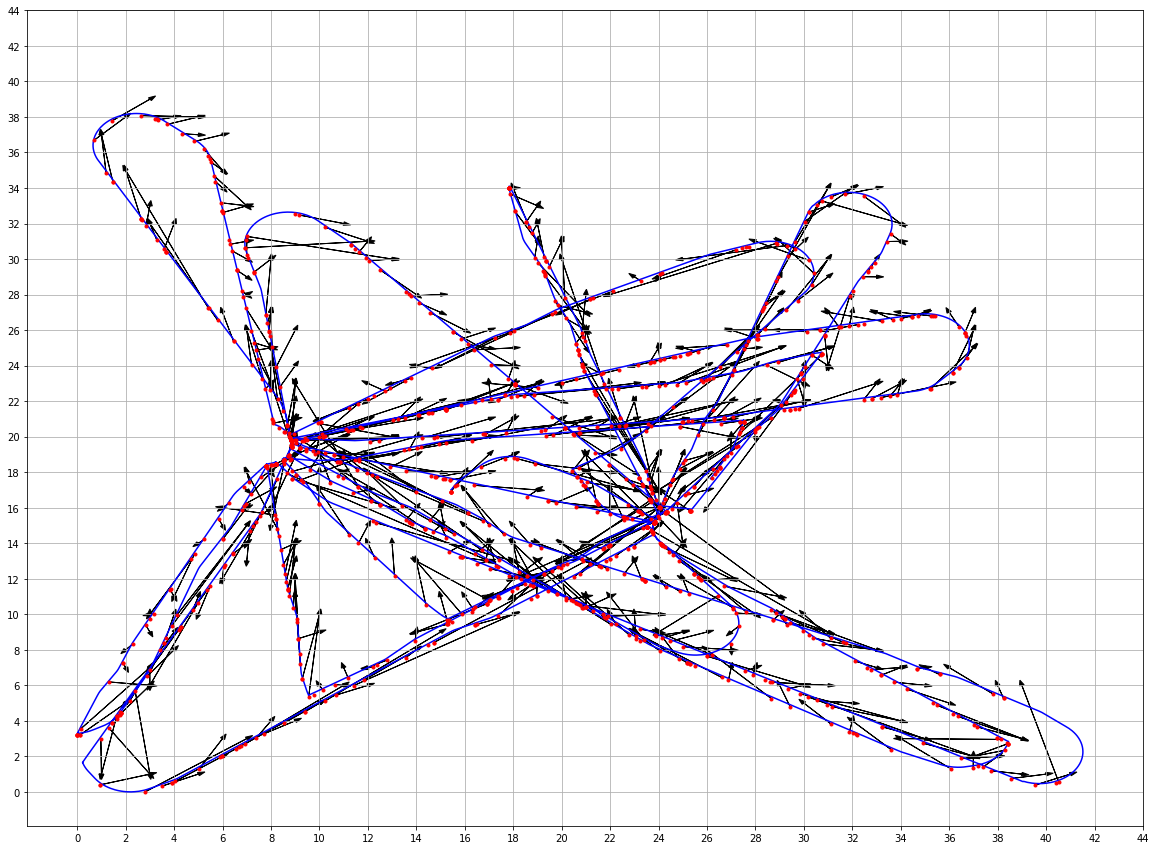

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [20, 15]
ax = plt.subplot()
plt.plot(trial.xyPos[:,0]/2, trial.xyPos[:,1]/2, color='b')
plt.plot(trial.scaled_XY[:,0], trial.scaled_XY[:,1], '.', color='r', markersize=6)
for index, row in trial.df.iterrows():
    # if (row['Xdif Predicted']>0) or (row['Ydif Predicted']>0):
    plt.arrow(row['X'], row['Y'], row['Xdif Predicted'], row['Ydif Predicted'],
                head_width=0.2, color='black')

ax.set_yticks(np.arange(0,46,2))
ax.set_xticks(np.arange(0,46,2))
ax.grid()